In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import lxml
import json

In [3]:
#provide list of all laptop from the multiple pages of given website 
total_laptop_list = list()
for i in range(50):
    if i == 0:
        url = "https://www.daraz.com.np/laptops/?spm=a2a0e.11779170.cate_5.4.287d2d2bBaUost&style=list"
    else:
        url = f"https://www.daraz.com.np/laptops/?page={i+1}&spm=a2a0e.11779170.cate_5.4.287d2d2bBaUost&style=list"
    html = requests.get(url).content 
    soup = BeautifulSoup(html, "lxml")
    maincontent = soup.find_all("script")[3]
    for content in maincontent:
        data = json.loads(content[16:])
    laptop_list = data["mods"]["listItems"]
    total_laptop_list.append(laptop_list)

In [23]:
#lists of list of necessary details of each laptops 
all_laptops = list()
for laptop_list in total_laptop_list:
    for laptop in laptop_list:
        laptops = list()
        laptops.append(laptop["name"])
        laptops.append(laptop["brandName"])
        try:
            laptops.append(laptop["ratingScore"])
        except Exception as e:
            laptops.append(0)
        laptops.append(laptop["description"])
        laptops.append(laptop["price"])
        all_laptops.append(laptops)
    

In [24]:
#length of the list of list
len(all_laptops)

2000

In [25]:
#converting the given list of list into pandas data frame
df = pd.DataFrame(all_laptops, columns = ["name", "brandName", "ratingScore", "description", "price"])

In [26]:
#gives first five rows 
df.head()

,name,brandName,ratingScore,description,price
0,"Apple MacBook Air Apple M1 chip, 13.3-inch/33....",Apple,5,[All-Day Battery Life â Go longer than ever ...,136999.00
1,Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...,Dell,4.7,"[CPU : i5 11th Gen, RAM : 8GB DDR 4, HDD : 512...",85990.00
2,Apple MacBook Air 13-inch M1 256GB - Oliz Store,Apple,4.8,"[Apple M1 chip with 8core CPU, 7core GPU, and ...",139999.00
3,Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...,Dell,4.6,[11th Generation Intel Core i3-1115G4 Processo...,52000.00
4,HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...,HP,4.6,"[CPU : i5-12450H 12th Gen, RAM : 8 GB DDR4, HD...",99990.00


In [27]:
#gives rows and columns
df.shape

(2000, 5)

In [30]:
#save the dataset as given dataset without the index
df.to_csv("laptop.csv", index = False)

In [73]:
#loading the dataset into pandas DataFrame
df = pd.read_csv("laptop.csv")

In [74]:
df.head()

,name,brandName,ratingScore,description,price
0,"Apple MacBook Air Apple M1 chip, 13.3-inch/33....",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0
1,Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0
2,Apple MacBook Air 13-inch M1 256GB - Oliz Store,Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0
3,Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0
4,HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0


In [75]:
df.shape

(2000, 5)

In [76]:
#provides information regarding each column of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         2000 non-null   object 
 1   brandName    2000 non-null   object 
 2   ratingScore  2000 non-null   float64
 3   description  2000 non-null   object 
 4   price        2000 non-null   float64
dtypes: float64(2), object(3)
memory usage: 78.2+ KB


In [77]:
#provides statistical desciption of numerical columns
df.describe()

,ratingScore,price
count,2000.000000,2000.000000
mean,0.265400,128771.030000
std,1.087402,73537.603397
min,0.000000,28900.000000
25%,0.000000,79800.000000
50%,0.000000,109999.000000
75%,0.000000,155666.250000
max,5.000000,555000.000000


In [78]:
#name column
df["name"].head()

0    Apple MacBook Air Apple M1 chip, 13.3-inch/33....
1    Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...
2      Apple MacBook Air 13-inch M1 256GB - Oliz Store
3    Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...
4    HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...
Name: name, dtype: object

# Insights
- name and description columns contain the most of the information like ram, processor, memory, hard disk and so on
- we should extract out those information and add respective columns in the dataframe

# Datacleaning

# Processor column
- Contains different processors like
a. AMD --> ryzen
b. intel -> i3, i5, i7, i9
c. Apple processors --> m1, m2

In [79]:
#Adding Processor column from name column using regex
import re
processor = []
for i in df.index:
    try:
        processor.append(re.findall("amd|[i][3579]|ryzen|[m][12]|intel" , df["name"][i].lower())[0])
    except:
        processor.append("other") #if the rows don't have avobe mentioned processor, it will be saved as other

In [80]:
df["processor"] = processor

In [81]:
df.head()

,name,brandName,ratingScore,description,price,processor
0,"Apple MacBook Air Apple M1 chip, 13.3-inch/33....",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1
1,Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5
2,Apple MacBook Air 13-inch M1 256GB - Oliz Store,Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1
3,Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3
4,HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5


In [82]:
df["processor"].unique()

array(['m1', 'i5', 'i3', 'intel', 'm2', 'ryzen', 'amd', 'other', 'i7',
       'i9'], dtype=object)

# Ram Column
- RAM in name column is usually one digit or two digits followed by gb

In [83]:
ram = []
for i in df.index:
    try:
        ram.append(re.findall("[0-9]gb|^[0-9][0-9]gb" , df["name"][i].lower())[0])
    except:
        try:
            ram.append(re.findall("[0-9] gb|^[0-9][0-9] gb" , df["name"][i].lower())[0])
        except:
            ram.append(np.nan)

In [84]:
df["ram"] = ram

In [85]:
df["ram"].isnull().sum()

183

In [86]:
df.head()

,name,brandName,ratingScore,description,price,processor,ram
0,"Apple MacBook Air Apple M1 chip, 13.3-inch/33....",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1,8gb
1,Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5,8gb
2,Apple MacBook Air 13-inch M1 256GB - Oliz Store,Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1,6gb
3,Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3,8gb
4,HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5,4gb


# Memory column
- memory in name column is usually three digit with gb or one digit with tb

In [87]:
memory =[]
for i in df.index:
    try:
        memory.append(re.findall("[0-9][0-9][0-9]gb|[0-9][0-9][0-9] gb", df["name"][i].lower())[0])
    except:
        try:
            memory.append(re.findall("[0-9][0-9][0-9]ssd|[0-9][0-9][0-9] ssd|[0-9][0-9][0-9]hdd|[0-9][0-9][0-9] hdd", df["name"][i].lower())[0])
        except:
            try:
                memory.append(re.findall("[0-9]tb|[0-9] tb", df["name"][i].lower())[0])
            except:
                memory.append(np.nan)

In [88]:
df["memory"] = memory

In [89]:
df["memory"].isnull().sum() #calculating total number of null values after filling the column

244

In [90]:
df["memory"].isnull().mean() #calculating mean of null values for this column

0.122

In [91]:
df.head()

,name,brandName,ratingScore,description,price,processor,ram,memory
0,"Apple MacBook Air Apple M1 chip, 13.3-inch/33....",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1,8gb,256gb
1,Dell Inspiron 15 3511 / i5 1135G7 / 8GB / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5,8gb,512 ssd
2,Apple MacBook Air 13-inch M1 256GB - Oliz Store,Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1,6gb,256gb
3,Dell Vostro 3400 i3 11th Gen / 8GB RAM / 256GB...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3,8gb,256gb
4,HP Victus 15 FA0031DX Gaming / i5-12450H 12th ...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5,4gb,512gb


# display size column
- display size in name column is digits/decimal followed by units like cm, inch, inches or symbals like ' or "

In [92]:
# Converting all the units into '"'
df["name"] =df["name"].str.lower().replace("cm", '"').str.replace("-", "")
df["name"] = df["name"].str.replace("inch", '"')
df["name"] =df["name"].str.replace("inches", '"')

In [93]:
#filtering the display size using regex
display = []
for i in range(len(df["name"])):
    try:
        display.append(re.findall("\d+\.\d+['\"]?|\d+['\"]|\d+\.\d+['\"]?|\d+ ['\"]", df["name"][i])[0])
    except:
        display.append(np.nan)

In [94]:
df["displaySize"] = display

In [95]:
df.head()

,name,brandName,ratingScore,description,price,processor,ram,memory,displaySize
0,"apple macbook air apple m1 chip, 13.3""/33.74 c...",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1,8gb,256gb,"13.3"""
1,dell inspiron 15 3511 / i5 1135g7 / 8gb / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5,8gb,512 ssd,"15.6"""
2,"apple macbook air 13"" m1 256gb oliz store",Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1,6gb,256gb,"13"""
3,dell vostro 3400 i3 11th gen / 8gb ram / 256gb...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3,8gb,256gb,"14"""
4,hp victus 15 fa0031dx gaming / i512450h 12th g...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5,4gb,512gb,"15.6"""


# Generation Column
- generation column in name column is usually one or two digit followed by word 'th' or 'gen' or 'generation'

In [96]:
df["name"]

0       apple macbook air apple m1 chip, 13.3"/33.74 c...
1       dell inspiron 15 3511 / i5 1135g7 / 8gb / 512 ...
2              apple macbook air 13" m1 256gb  oliz store
3       dell vostro 3400 i3 11th gen / 8gb ram / 256gb...
4       hp victus 15 fa0031dx gaming / i512450h 12th g...
                              ...                        
1995    ideapad slim 3 / 12th gen intel core i5 10c (2...
1996    acer aspire 3 (a31558g55xc) i5(1135g7)/8gb ddr...
1997    asus zen book 14 ux425ea core i511th gen/ 8gb ...
1998    asus vivo book x515ea core i3 11th gen 15.6" f...
1999    laptop/hp 14s/ intel corei5/8gb ram/ 512 gb ss...
Name: name, Length: 2000, dtype: object

In [98]:
#filtering generation from name using regex
gen = []
for i in range(len(df["name"])):
    try:
        gen.append(re.findall("\d+th|\d+gen|\d+ th|\d+ gen", df["name"][i])[0])
    except:
        gen.append(np.nan)

In [99]:
#creating generation column
df["gen"] = gen

In [100]:
df.head()

,name,brandName,ratingScore,description,price,processor,ram,memory,displaySize,gen
0,"apple macbook air apple m1 chip, 13.3""/33.74 c...",Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1,8gb,256gb,"13.3""",NaN
1,dell inspiron 15 3511 / i5 1135g7 / 8gb / 512 ...,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5,8gb,512 ssd,"15.6""",NaN
2,"apple macbook air 13"" m1 256gb oliz store",Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1,6gb,256gb,"13""",NaN
3,dell vostro 3400 i3 11th gen / 8gb ram / 256gb...,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3,8gb,256gb,"14""",11th
4,hp victus 15 fa0031dx gaming / i512450h 12th g...,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5,4gb,512gb,"15.6""",12th


In [103]:
df["gen"].isnull().sum() #880 values are null

880

<AxesSubplot: >

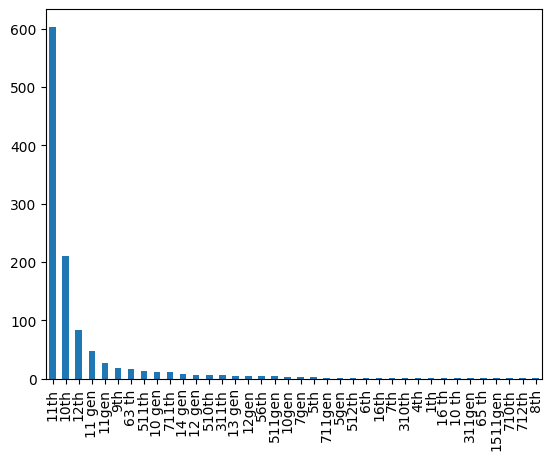

In [104]:
#counting values of gen column
df.gen.value_counts().plot(kind="bar") #contains repeated value which should be dealt later

In [105]:
#name in name column is usually first three words
name = []
for item in df["name"].str.split().str[:3]:
    name.append(" ".join(item))

In [106]:
#creating name column
df["name"] = name

In [107]:
df.head()

,name,brandName,ratingScore,description,price,processor,ram,memory,displaySize,gen
0,apple macbook air,Apple,5.0,['All-Day Battery Life â\x80\x93 Go longer tha...,136999.0,m1,8gb,256gb,"13.3""",NaN
1,dell inspiron 15,Dell,4.7,"['CPU : i5 11th Gen', 'RAM : 8GB DDR 4', 'HDD ...",85990.0,i5,8gb,512 ssd,"15.6""",NaN
2,apple macbook air,Apple,4.8,"['Apple M1 chip with 8core CPU, 7core GPU, and...",139999.0,m1,6gb,256gb,"13""",NaN
3,dell vostro 3400,Dell,4.6,['11th Generation Intel Core i3-1115G4 Process...,52000.0,i3,8gb,256gb,"14""",11th
4,hp victus 15,HP,4.6,"['CPU : i5-12450H 12th Gen', 'RAM : 8 GB DDR4'...",99990.0,i5,4gb,512gb,"15.6""",12th


In [108]:
#droping description column as it is not necessary
df.drop("description", axis = 1, inplace=True)

In [109]:
df.head()

,name,brandName,ratingScore,price,processor,ram,memory,displaySize,gen
0,apple macbook air,Apple,5.0,136999.0,m1,8gb,256gb,"13.3""",NaN
1,dell inspiron 15,Dell,4.7,85990.0,i5,8gb,512 ssd,"15.6""",NaN
2,apple macbook air,Apple,4.8,139999.0,m1,6gb,256gb,"13""",NaN
3,dell vostro 3400,Dell,4.6,52000.0,i3,8gb,256gb,"14""",11th
4,hp victus 15,HP,4.6,99990.0,i5,4gb,512gb,"15.6""",12th


In [110]:
#saving the cleaned data as csv file
df.to_csv("Cleaned_laptop.csv", index = False)

In [111]:
# Saving this data into database using sqllite
import sqlite3

In [112]:
#creating and connecting database
con = sqlite3.connect("laptop.db")

In [114]:
con

In [115]:
#creating cursor for execution of sql query
cur = con.cursor()

In [116]:
#creating table
try:
    table_query = f"Create table laptop_data {tuple(df.columns)}"
    cur.execute(table_query) #table is created
except Exception as e:
    print(e)

In [118]:
#Converting data into list of tuple 
datapoints = df.to_records(index=False).tolist()

In [123]:
#inserting data into table 
insertquery = "insert into laptop_data values (?, ?, ?, ?, ?, ?, ?, ?, ?)"
cur.executemany(insertquery, datapoints)

In [125]:
#checking if the data are inserted or not
#Read Statement
read = "select * from laptop_data"
cur.execute(read).fetchall()

[('apple macbook air',
  'Apple',
  5.0,
  136999.0,
  'm1',
  '8gb',
  '256gb',
  '13.3"',
  None),
 ('dell inspiron 15',
  'Dell',
  4.7,
  85990.0,
  'i5',
  '8gb',
  '512 ssd',
  '15.6"',
  None),
 ('apple macbook air',
  'Apple',
  4.8,
  139999.0,
  'm1',
  '6gb',
  '256gb',
  '13"',
  None),
 ('dell vostro 3400',
  'Dell',
  4.6,
  52000.0,
  'i3',
  '8gb',
  '256gb',
  '14"',
  '11th'),
 ('hp victus 15', 'HP', 4.6, 99990.0, 'i5', '4gb', '512gb', '15.6"', '12th'),
 ('acer aspire 5',
  'Acer',
  4.7,
  51000.0,
  'intel',
  '4gb',
  '128gb',
  '15.6"',
  '11th'),
 ('mi notebook pro',
  'MI',
  5.0,
  109999.0,
  'intel',
  '6gb',
  '512gb',
  '14 "',
  '11th'),
 ('dell vostro 3400',
  'Dell',
  4.7,
  75990.0,
  'i5',
  '8gb',
  '512ssd',
  '14"',
  '11th'),
 ('apple macbook air',
  'Apple',
  5.0,
  184899.0,
  'm2',
  '6gb',
  '256gb',
  '13.6"',
  None),
 ('mi notebook ultra',
  'MI',
  5.0,
  136999.0,
  'intel',
  '6gb',
  '512gb',
  '156"',
  '11th'),
 ('dell vostro 3400',


In [127]:
#couting data total number of rows in sql table
count_query = "select count(*) from laptop_data"
cur.execute(count_query).fetchall()

[(2000,)]